In [1]:
'''
CS6140 Assignment 4
Jul 14 2022
Wing Man, Kwok
'''

'\nCS6140 Assignment 4\nJul 14 2022\nWing Man, Kwok\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import uniform                       #for the command "uniform"
from math import sqrt, log, exp, pi

In [3]:
#Q1.1  Use a single Gaussion to estimate and create a plot
#Model univariate Gaussian

class Gaussian:

  def __init__(self, mu, sigma):

      self.mu = mu
      self.sigma = sigma
  
  def pdf(self, datum):   #create probability density function

      gassian_exp = (datum - self.mu) / abs(self.sigma)    #Probability of a data point given the current parameters
      y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(- gassian_exp * gassian_exp / 2)

      return y

In [4]:
#Q1.2 Use a 2 Gaussian mixture model to estimate and create a plot
#Model mixture of two univariate Gaussians and their EM estimation

class GaussianMixture_self:
  
  def __init__(self, data, mu_min, mu_max, sigma_min=1, sigma_max=1, mix=.5):
    self.data = data
    self.guassian_model_1 = Gaussian(uniform(mu_min, mu_max), uniform(sigma_min, sigma_max))   #generate 2 gaussian distribution with fed x, sigma, mu
    self.guassian_model_2 = Gaussian(uniform(mu_min, mu_max), uniform(sigma_min, sigma_max))
    self.mix = mix                                                                             #generate how much to overlap 2 gaussians
    
  def Estep(self):            #Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage

    self.loglikelihood = 0

    for data_point in self.data:

      guassian_distribution_1 = self.guassian_model_1.pdf(data_point) 
      guassian_distribution_2 = self.guassian_model_2.pdf(data_point)

      probability_x_on_guassian1 = guassian_distribution_1 * self.mix  
      probability_x_on_guassian2 = guassian_distribution_2  * (1 - self.mix)  

      all_probability_generate_x = probability_x_on_guassian1 + probability_x_on_guassian2

      expectation_1 =  probability_x_on_guassian1 / (all_probability_generate_x)  #expectation of datapoint falls at gaussian 1
      expectation_2 =  probability_x_on_guassian2 / (all_probability_generate_x)  #expectation of datapoint falls at gaussian 2

      self.loglikelihood += log(all_probability_generate_x)        #maximize log likelihood of expectation

      yield (expectation_1, expectation_2)

  def Mstep(self, weights):   #Perform an M(aximization)-step"

    (Posteriors_1, Posteriors_2) = zip(*weights) 

    self.guassian_model_1.mu = sum(Posteriors_1 * data) / sum(Posteriors_1)
    self.guassian_model_2.mu = sum(Posteriors_2 * data) / sum(Posteriors_2)

    self.guassian_model_1.sigma = sqrt(sum(Posteriors_1 * (( data - self.guassian_model_1.mu) ** 2) / sum(Posteriors_1)))
    self.guassian_model_2.sigma = sqrt(sum(Posteriors_2 * (( data - self.guassian_model_2.mu) ** 2) / sum(Posteriors_2)))

    n = len(data)
    self.mix = sum(Posteriors_1) / n

  def iterate(self, N=1, verbose=False):    #Perform N iterations, then compute log-likelihood"
     
    for i in range(1, N+1):
      self.Mstep(self.Estep())
    
    self.Estep()

  def pdf(self, x):
    return (self.mix)*self.guassian_model_1.pdf(x) + (1-self.mix)*self.guassian_model_2.pdf(x)

  def __str__(self):
    pass


Mu: 4.449795287015505 Sigma: 4.750714449353187


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


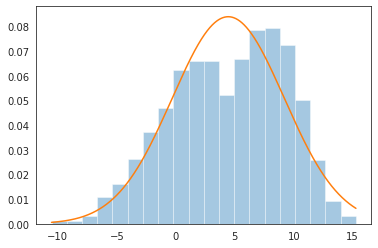

Input Gaussian 1: μ = 2.0, σ = 4.0
Input Gaussian 2: μ = 9.0, σ = 2.0
Gaussian 1: μ = 8.8, σ = 2.2, weight = 0.38
Gaussian 2: μ = 1.8, σ = 3.8, weight = 0.62


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


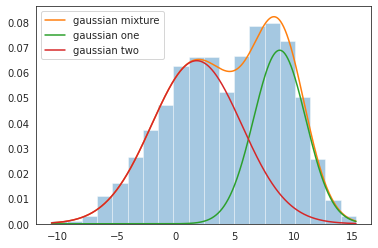

In [5]:
random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)

x = np.linspace(min(data), max(data), 2000)  

#-------- Q1.1 Plot single Gaussian
#Fit datapoint into Gaussian
fit_gaussian = Gaussian(np.mean(data), np.std(data))
print("Mu:", fit_gaussian.mu, "Sigma:", fit_gaussian.sigma)
single_gaussian = stats.norm(fit_gaussian.mu, fit_gaussian.sigma).pdf(x)

#Plot probability distribution 
sns.set_style("white")
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, single_gaussian, label='single gaussian')
plt.show()

#---------- Q1.2 Use a 2 Gaussian mixture model to estimate and create a plot
n_iterations = 300
best_GMM = None
best_loglikelihood = float('-inf')

for i in range(4):

  GMM = GaussianMixture_self(data, mu_min=min(data), mu_max = max(data))
  
  for j in range (n_iterations):
    try:
      GMM.iterate()
      if GMM.loglikelihood > best_loglikelihood:
              best_loglikelihood = GMM.loglikelihood
              best_GMM = GMM
    except (ZeroDivisionError, ValueError, RuntimeWarning):
      pass

print('Initialization: Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("1", Mean1, Standard_dev1))
print('Initialization: Gaussian {:}: μ = {:.2}, σ = {:.2}'.format("2", Mean2, Standard_dev2))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("1", best_GMM.guassian_model_1.mu, best_mix.guassian_model_1.sigma, best_GMM.mix))
print('Gaussian {:}: μ = {:.2}, σ = {:.2}, weight = {:.2}'.format("2", best_GMM.guassian_model_2.mu, best_mix.guassian_model_2.sigma, (1-best_GMM.mix)))

sns.distplot(data, bins=20, kde=False, norm_hist=True)
gaussian_both = [best_GMM.pdf(datapoints) for datapoints in x]
plt.plot(x, gaussian_both, label='Gaussian Mixture')

gaussian_1 = [best_GMM.guassian_model_1.pdf(datapoints) * best_GMM.mix for datapoints in x]
plt.plot(x, gaussian_1, label='Gaussian one')

gaussian_2 = [best_GMM.guassian_model_2.pdf(datapoints) * (1-best_GMM.mix) for datapoints in x]
plt.plot(x, gaussian_2, label='Gaussian two')
plt.legend()
plt.show()
